# Programming Exercise 1: Linear Regression - Optional
                                      

If you have successfully completed the required part of Exercise 1, congratulations!

You now understand linear regression and should be able to start using it
on your own datasets. For the rest of this programming exercise, we have
included a few functions you will have to implement. These exercises will help you
gain a deeper understanding of the material, and if you are able to do
so, we encourage you to complete them as well. In this notebook, you will implement linear regression on multiple variables and get to see it work on data. You will be asked to complete the following functions:

-  computeCostMulti - Cost function for multiple variables
-  gradientDescentMulti - Gradient descent function for multiple variables
-  featureNormalize - Function to normalize features
-  normalEqn - Function to compute the normal equations

**Instructions**:

For each function, we have provided starter code for you. You will find a description of the problems followed by a cell which contains some code. You will have to write your own code in these cells to complete the four functions mentioned above. Once you run the cells, your output would be displayed. If it matches the expected output, then you should continue with the next part of the exercise, else, you would have to try again. 

Please read the [Notebook FAQ](https://www.coursera.org/learn/machine-learning/supplement/S9fb6/jupyter-notebook-faq) to get familiar with the Jupyter environment and the commands. We also highly recommend going to your workspace to explore the files you will be working with before starting the exercise.

To go to the workspace: press on File ==> Open.

### NOTE:
You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment. Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 

#### After submitting your assignment, you can [check your grades here](https://www.coursera.org/learn/machine-learning/programming/V6ZFz/linear-regression-optional). 

Linear regression with multiple variables
=========================================

You will implement linear regression with multiple
variables to predict housing prices
. Suppose you are selling your
house and you want to know what a good market price would be. One way to
do this is to first collect information on recent houses sold and to make a
model of housing prices. The file ***[ex1data2.txt](ex1data2.txt)*** contains a
training set of housing prices in Portland, Oregon. The first column is
the size of the house (in square feet), the second column is the number
of bedrooms, and the third column is the price of the house. 

Feature Normalization 
---------

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ
by orders of magnitude, first performing feature scaling can make
gradient descent converge much more quickly.
Your task here is to complete the function, featureNormalize, in the cell below. You should:

-   Subtract the mean value of each feature from the dataset.

-   After subtracting the mean, additionally scale (divide) the feature
    values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is
in the range of values of a particular feature (most data points will
lie within $\pm$2 standard deviations of the mean); this is an
alternative to taking the range of values (max-min). In Octave/MATLAB,
you can use the `std` function to compute the standard deviation.
For example, the quantity
`X(:,1)` contains all the values of $x_1$ (house sizes) in the
training set, so `std(X(:,1))` computes the standard deviation of
the house sizes. When you call featureNormalize(X),
the extra column of 1’s corresponding to $x_0 = 1$ has not yet been
added to `X`. You will do
this for all the features and your code should work with datasets of all
sizes (any number of features / examples). Note that each column of the
matrix `X` corresponds to one feature.

### Instructions
When normalizing the features, it is important
to store the values used for normalization - the *mean value* and the
*standard deviation*. After learning the
parameters from the model, we often want to predict the prices of houses
we have not seen before. Given a new $\mathbf{x}$ value (house size and number of bedrooms), we must first normalize $\mathbf{x}$ using
the mean and standard deviation that we had previously computed from the
training set.

featureNormalize(X) returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1. This is often a good preprocessing step to do when working with learning algorithms.

You need to store the mean and the standard deviation of each feature in mu and sigma respectively.

***Hint:*** You might find the 'mean', 'std', and 'bsfxun' functions useful.

In [158]:
% Load the Data
warning('off'); addpath('../readonly/Assignment1b/');
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

In [159]:
% GRADED FUNCTION: featureNormalize
function [X_norm, mu, sigma] = featureNormalize(X)

% You need to set these values correctly
X_norm = X;
mu = zeros(1, size(X, 2));
sigma = zeros(1, size(X, 2));

% ====================== YOUR CODE HERE ======================
mu_ = mean(X);
sigma_ = std(X);

mu = mu + mu_;
sigma = sigma + sigma_;

X_norm = (X - mu)./sigma;

% ============================================================
end

In [160]:
% Scale features and set them to zero mean
[X mu sigma] = featureNormalize(X)

% Add intercept term to X
X = [ones(m, 1) X];

X =

   1.3001e-01  -2.2368e-01
  -5.0419e-01  -2.2368e-01
   5.0248e-01  -2.2368e-01
  -7.3572e-01  -1.5378e+00
   1.2575e+00   1.0904e+00
  -1.9732e-02   1.0904e+00
  -5.8724e-01  -2.2368e-01
  -7.2188e-01  -2.2368e-01
  -7.8102e-01  -2.2368e-01
  -6.3757e-01  -2.2368e-01
  -7.6357e-02   1.0904e+00
  -8.5674e-04  -2.2368e-01
  -1.3927e-01  -2.2368e-01
   3.1173e+00   2.4045e+00
  -9.2196e-01  -2.2368e-01
   3.7664e-01   1.0904e+00
  -8.5652e-01  -1.5378e+00
  -9.6222e-01  -2.2368e-01
   7.6547e-01   1.0904e+00
   1.2965e+00   1.0904e+00
  -2.9405e-01  -2.2368e-01
  -1.4179e-01  -1.5378e+00
  -4.9916e-01  -2.2368e-01
  -4.8673e-02   1.0904e+00
   2.3774e+00  -2.2368e-01
  -1.1334e+00  -2.2368e-01
  -6.8287e-01  -2.2368e-01
   6.6103e-01  -2.2368e-01
   2.5081e-01  -2.2368e-01
   8.0070e-01  -2.2368e-01
  -2.0345e-01  -1.5378e+00
  -1.2592e+00  -2.8519e+00
   4.9477e-02   1.0904e+00
   1.4299e+00  -2.2368e-01
  -2.3868e-01   1.0904e+00
  -7.0930e-01  -2.2368e-01
  -9.5845e-01  -2.2368e

### Compute the Cost for Multiple Variables: 


Previously, you implemented gradient descent on a univariate regression
problem. The only difference now is that there is one more feature in
the matrix `X`. The hypothesis function and the batch gradient
descent update rule remain unchanged. You first have to implement 
the cost function for multiple variables. Once you are done implementing it, you will complete the gradient descent for linear regression with
multiple variables. If your code in the previous exercise (single variable)
already supports multiple variables, you can use it here too. Make sure
your code supports any number of features and is well-vectorized. You
can use `size(X, 2)` to find out how many features are present in
the dataset.


In the multivariate case, the cost function can also be written in the
following vectorized form: 

$$J(\theta) = \frac{1}{2m}(X\theta-\vec{y})^{T}(X\theta-\vec{y})$$

where 

$$X=
\left(\begin{array}{cc} 
---(x^{(1)})^T ---\\
---(x^{(2)})^T ---\\
       .          \\
       .           \\
---(x^{(m)})^T ---\\
\end{array}\right) \; \; \; \;  \vec{y} = 
\left(\begin{array}{cc} 
y^{(1)}\\ 
y^{(2)}\\ 
  .    \\
  .  \\
y^{(m)}\\ 
\end{array}\right) $$

The vectorized version is efficient when you’re working with numerical
computing tools like Octave/MATLAB. If you are an expert with matrix
operations, you can prove to yourself that the two forms are equivalent.

***Instructions***

The function below should compute the cost for linear regression with multiple variables.

J = computeCostMulti(X, y, theta) computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.

Complete the cell below.

In [161]:
% GRADED FUNCTION: computeCostMulti
function J = computeCostMulti(X, y, theta)

m = length(y); % number of training examples
J = 0;         % compute the cost and set it to J

% ====================== YOUR CODE HERE ======================
h = X * theta;
J = 1/(2*m) * sum((h - y).^2);

% ============================================================
end

In [162]:
% Load data
data = load('ex1data2.txt'); X = data(:, 1:2); y = data(:, 3); m = length(y);

% Normalize and add ones
[X mu sigma] = featureNormalize(X);
X = [ones(m, 1) X];

% Compute cost for theta with all zeros
theta = zeros(3, 1);         % We already loaded X and y

computeCostMulti(X, y, theta)

ans =    6.5592e+10


**Expected Output:**

6.5592e+10

### Computing Gradient Descent for Multiple Variables

gradientDescentMulti uses gradient descent to learn theta.

theta = gradientDescentMulti(x, y, theta, alpha, num_iters) updates theta by taking num_iters gradient steps with learning rate alpha. You should perform a single gradient step on the parameter vector theta.

***Hint***: While debugging, it can be useful to print out the values of the cost function (computeCostMulti) and gradient here. Once you are done you could just press on Cell ==> Run All to make sure that you have initialized all the variables in the correct order. 

In [163]:
% Load variables
alpha = 0.01;                % Initializing alpha
num_iters = 400;             % Number of iterations 
whos                         % The list of variables should include X, y, theta, alpha and num_iters

Variables in the current scope:

   Attr Name           Size                     Bytes  Class
   ==== ====           ====                     =====  ===== 
        J_1          400x1                       3200  double
        J_2          400x1                       3200  double
        J_3          400x1                       3200  double
        J_history    400x1                       3200  double
        X             47x3                       1128  double
        alpha          1x1                          8  double
        alpha_1        1x1                          8  double
        ans            1x1                          8  double
        data          47x3                       1128  double
        m              1x1                          8  double
        mu             1x2                         16  double
        num_iters      1x1                          8  double
        price          1x1                          8  double
        pt             1x2            

In [164]:
% GRADED FUNCTION: gradientDescentMulti
function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)

m = length(y);                    % number of training examples
J_history = zeros(num_iters, 1);  % vector to store the cost at every iteration

    for iter = 1:num_iters

    % ====================== YOUR CODE HERE =====================
    h = X * theta;% m x 1
    grad = h - y; % m x 1
    theta = theta - alpha/m * (grad' * X)';

    % ===========================================================
    J_history(iter) = computeCostMulti(X, y, theta); % Save the cost J in every iteration    

    end

end

Now that you have completed the computeCostMulti and gradientDescentMulti functions, you could run the cell below to see a plot of the number of iterations versus the cost. You should modify the value of the price below to predict the price of a new house that has a size of 1650 sq-ft and 3 bedrooms. Recall that the first column of X is all-ones. Thus, it does not need to be normalized.

theta =

   3.3430e+05
   1.0009e+05
   3.6735e+03

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289314.620338


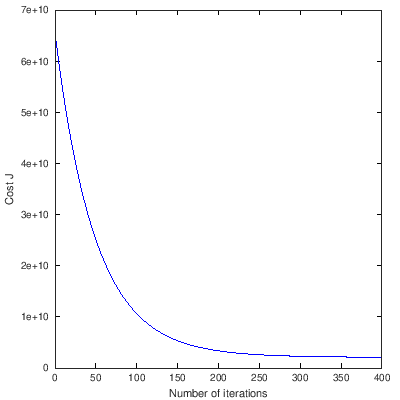

In [165]:
% Initialize some variables
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters); % run your gradient descent

% Plot the convergence graph
figure('Position',[0,0,400,400]);
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

theta      % Display result from gradient descent

% ====================== YOUR CODE HERE ======================
pt = ([1650, 3] - mu)./sigma;
price = [1, pt] * theta;
% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

### Optional (ungraded) exercise: Selecting learning rates

In this part of the exercise, you will get to try out different learning
rates for the dataset and find a learning rate that converges quickly.
You can change the learning rate by 
changing the part of the code that sets the learning rate. The next
phase will call your gradientDescent function and run gradient descent for about 50 iterations at the chosen
learning rate. The function should also return the history of
$J(\theta)$ values in a vector J. After the last iteration, the
cell will plot the J values against the number
of iterations. If you picked a learning rate within a good range,
your plot will look similar to: 
<img src="../readonly/Assignment1b/figure 1.png" width="500" height="500">


If your graph looks
very different, especially if your value of $J(\theta)$ increases or
even blows up, adjust your learning rate and try again. We recommend
trying values of the learning rate $\alpha$ on a log-scale, at
multiplicative steps of about 3 times the previous value (i.e., 0.3,
0.1, 0.03, 0.01 and so on). You may also want to adjust the number of
iterations you are running if that will help you see the overall trend
in the curve.

**Implementation Note**: If your learning rate is too large, $J(\theta)$ can diverge and 
`blow up`, resulting in values which are too large for computer calculations. In these situations,
Octave/MATLAB will tend to return NaNs. NaN stands for not a number and is often caused by undefined
operations that involve $-\infty$ and $+\infty$

**Tip**: To compare how different learning rates affect
convergence, it’s helpful to plot J for several learning rates on the
same figure. In Octave/MATLAB, this can be done by performing gradient
descent multiple times with a ’hold on’ command between plots.
Concretely, if you’ve tried three different values of alpha (you should
probably try more values than this) and stored the costs in J1, J2, and
J3 you can plot them using the same code in the second half of the cell below. We have done it for you for one example, you should do it with different alpha values.  
 


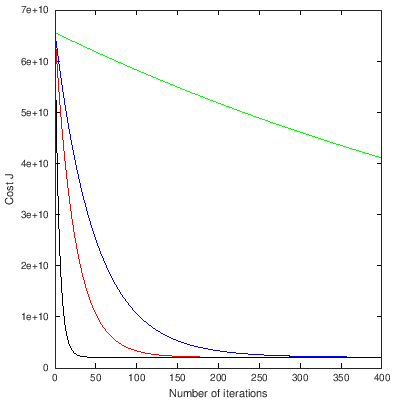

In [166]:
% Do it for different alpha values. (i.e. initiialize different alphas)
alpha_1 = 0.02;
num_iters = 400;


% Add some code below to run gradientDescentMulit on different alphas and thetas
% You could initialize J_2, J_3, etc.. the same way we have have J_1 
theta_1 = zeros(3, 1);
theta_2 = zeros(3, 1);
theta_3 = zeros(3, 1);
[theta_1, J_1] = gradientDescentMulti(X, y, theta_1, alpha_1, num_iters);
[theta_2, J_2] = gradientDescentMulti(X, y, theta_2, 0.0006, num_iters);
[theta_3, J_3] = gradientDescentMulti(X, y, theta_3, 0.09, num_iters);
% ----------------------------------------------------------
% Plot the convergence graphs
figure('Position',[0,0,400,400]);
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% To compare how different learning learning rates affect convergence, 
% it's helpful to plot J for several learning rates on the same figure.

hold on;
plot(1:numel(J_1), J_1, 'r', 'LineWidth',2);
hold on;
plot(1:numel(J_2), J_2(1:400), 'g');
plot(1:numel(J_3), J_3(1:400), 'k');

% The final arguments 'b', 'r', and 'k' specify different colors for the plots.


Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient
descent takes a very long time to converge to the optimal value.
Conversely, with a large learning rate, gradient descent might not
converge or might even diverge. Using the best learning rate that you
found, rerun your code to run gradient descent until convergence to find
the final values of $\theta$. Next, use this value of $\theta$ to
predict another time the price of a house with 1650 square feet and 3 bedrooms. You
will use these values later to check your implementation of the normal
equations. Don’t forget to normalize your features when you make this
prediction! 


### Normal Equations

In the lecture videos, you learned the closed-form solution to
linear regression. Using that formula does not require any feature scaling, and you will
get an exact solution in one calculation: there is no “loop until
convergence” like in gradient descent. Complete the function below to use the formula to calculate $\theta$.
Remember that while you don’t need to scale your features, we still need
to add a column of 1’s to the X matrix to have an intercept term
($\theta_0$). We already added a one's vector to our X. After you have completed the NormalEqn function, run the cell.

***Instructions***

normalEqn computes the closed-form solution to linear regression using the normal equations.

Compute the closed form solution to linear regression and put the result in theta.


In [171]:
% GRADED FUNCTION: normalEqn
function [theta] = normalEqn(X, y)

theta = zeros(size(X, 2), 1);

% ====================== YOUR CODE HERE ======================
theta = inv(X' * X) * X' * y;
% ============================================================

end

In [172]:
theta = normalEqn(X, y)

theta =

   3.4041e+05
   1.1063e+05
  -6.6495e+03



*Optional (ungraded) exercise:* Now, once you have found $\theta$ using
this method, use it to make a price prediction for a 1650-square-foot
house with 3 bedrooms. You should find that gives the same predicted
price as the value you obtained using the model fit with gradient
descent above. 

In [169]:
% Try it below 
